### Loading the package

In [1]:
%run artifactpackage.ipynb
%run Confusionmatrix.ipynb
%run masrur_ploting_utils.ipynb

2023-10-25 05:58:04.517490: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-25 05:58:04.518960: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-25 05:58:04.550260: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-25 05:58:04.550870: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-25 05:58:05.151055: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

### Loading The Datasets

In [2]:
#Training dataset
dc = pd.read_csv('/media/masharifin/D Drive/ComprehensiveExam/Datasets/CIC-Malmem/ObfuscatedMalMem2022.csv')
dc['Class'] = dc['Class'].replace({'Benign': 0, 'Malware': 1})
dc

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,221,26,24,116,0,121,87,0,8,0
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,222,26,24,118,0,122,87,0,8,0
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,222,26,27,118,0,120,88,0,8,0
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,222,26,27,118,0,120,88,0,8,0
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,222,26,24,118,0,124,87,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,0,...,221,26,24,116,0,120,86,0,8,1
58592,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,0,...,221,26,24,116,0,116,88,0,8,1
58593,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,0,...,221,26,24,116,0,120,88,0,8,1
58594,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,0,...,221,26,24,116,0,120,87,0,8,1


In [3]:
#Test Dataset
dr = pd.read_csv('/media/masharifin/D Drive/ComprehensiveExam/Datasets/resampled_data_randomsample.csv')
dr['Class'] = dr['Class'].replace({'Benign': 0, 'Malware': 1})
dc

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,221,26,24,116,0,121,87,0,8,0
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,222,26,24,118,0,122,87,0,8,0
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,222,26,27,118,0,120,88,0,8,0
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,222,26,27,118,0,120,88,0,8,0
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,222,26,24,118,0,124,87,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,0,...,221,26,24,116,0,120,86,0,8,1
58592,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,0,...,221,26,24,116,0,116,88,0,8,1
58593,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,0,...,221,26,24,116,0,120,88,0,8,1
58594,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,0,...,221,26,24,116,0,120,87,0,8,1


In [4]:
# # List of columns to drop
# columns_to_drop_dc = ['ldrmodules.not_in_init_avg', 'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_mem_avg']

# # Drop the specified columns
# dc.drop(columns=columns_to_drop_dc, inplace=True)

# dc.info()

In [5]:
# # List of columns to drop
# columns_to_drop_dr = ['apihooks.nhooks', 'apihooks.nhooksInline', 'apihooks.nhooksUsermode']

# # Drop the specified columns
# dr.drop(columns=columns_to_drop_dr, inplace=True)

# dr.info()

In [6]:
features = dc.drop('Class', axis=1).values
Class = dc['Class'].values
X_train=dc.drop(columns='Class')
y_train=dc['Class']

In [7]:
X_train

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,389,221,26,24,116,0,121,87,0,8
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,392,222,26,24,118,0,122,87,0,8
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,395,222,26,27,118,0,120,88,0,8
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,395,222,26,27,118,0,120,88,0,8
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,392,222,26,24,118,0,124,87,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,0,...,389,221,26,24,116,0,120,86,0,8
58592,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,0,...,389,221,26,24,116,0,116,88,0,8
58593,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,0,...,389,221,26,24,116,0,120,88,0,8
58594,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,0,...,389,221,26,24,116,0,120,87,0,8


In [8]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
58591    1
58592    1
58593    1
58594    1
58595    1
Name: Class, Length: 58596, dtype: int64

In [9]:
features = dr.drop('Class', axis=1).values
Class = dr['Class'].values
X_test=dr.drop(columns='Class')
y_test=dr['Class']

In [10]:
X_test

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,apihooks.nhooks,apihooks.nhooksInline,apihooks.nhooksUsermode
0,54,17,1.911111e+01,0,-0.055556,3052,56.518519,21894,437.880000,0,...,0,0,0,0,49,1,19,38958,38672,38805
1,51,14,2.100000e+01,0,-0.039216,3048,59.764706,21760,453.333333,0,...,0,0,0,0,48,1,20,37501,37204,37348
2,58,17,1.901724e+01,0,-0.051724,3140,54.137931,19673,364.314815,0,...,0,0,0,0,40,0,17,36283,36038,36130
3,83,26,1.985542e+01,0,-0.060241,4200,50.602410,3963,52.144737,0,...,0,0,0,0,40,0,17,40675,40262,40522
4,50,16,1.690000e+01,0,-0.040000,2878,57.560000,17711,376.829787,0,...,0,0,0,0,44,1,18,33353,33116,33200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,60,19,1.953333e+01,0,-0.066667,3399,57.610169,20910,380.181818,0,...,0,0,0,0,54,0,22,37450,37168,37297
58592,71,21,1.785915e+01,0,-0.042254,3709,52.239437,23132,345.253731,0,...,0,0,0,0,44,1,19,41036,40762,40883
58593,55,18,2.223636e+01,0,-0.036364,3052,55.490909,3129,61.352941,0,...,0,0,0,0,49,0,18,35462,35184,35309
58594,65,19,1.683077e+01,0,-0.076923,3144,49.125000,21406,369.068965,0,...,0,0,0,0,44,0,17,25369,25198,25228


In [11]:
y_test

0        1
1        1
2        1
3        1
4        1
        ..
58591    1
58592    1
58593    1
58594    1
58595    1
Name: Class, Length: 58596, dtype: int64

### Random_Model_1: Decision Tree

In [12]:
Dt_classifier= DecisionTreeClassifier(random_state=29)
Dt_classifier.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train_dt = Dt_classifier.predict(X_train)
y_pred_test_dt = Dt_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)

print(f"Training Accuracy: {accuracy_train_dt}")
print(f"Test Accuracy: {accuracy_test_dt}")

Training Accuracy: 1.0
Test Accuracy: 1.0


/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


In [13]:
filename_dt= 'Binary_security_dt_rm.sav'
pickle.dump(Dt_classifier, open(filename_dt, 'wb'))
load_model_dt=pickle.load(open('Binary_security_dt_rm.sav','rb'))
load_pred_dt=load_model_dt.predict(X_test)

/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


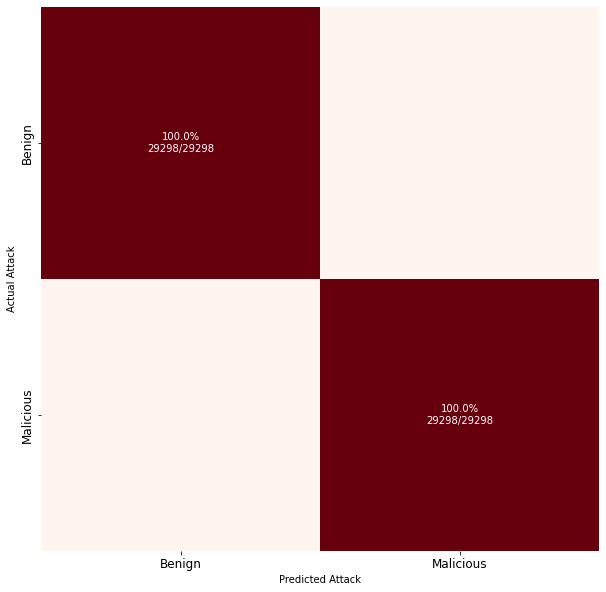

In [14]:
plot_cm(y_test, load_pred_dt)
plt.savefig('cm.eps',dpi=600)

                                   Feature  Importance
44                svcscan.process_services    0.987070
47                         svcscan.nactive    0.006724
8             handles.avg_handles_per_proc    0.002973
51                         apihooks.nhooks    0.001143
7                         handles.nhandles    0.000700
27            psxview.not_in_eprocess_pool    0.000682
23                     malfind.ninjections    0.000384
11                          handles.nevent    0.000124
12                        handles.ndesktop    0.000068
1                             pslist.nppid    0.000063
10                           handles.nfile    0.000059
19                         handles.nmutant    0.000010
48                    callbacks.ncallbacks    0.000000
39       psxview.not_in_deskthrd_false_avg    0.000000
33         psxview.not_in_pslist_false_avg    0.000000
34  psxview.not_in_eprocess_pool_false_avg    0.000000
35   psxview.not_in_ethread_pool_false_avg    0.000000
36    psxv

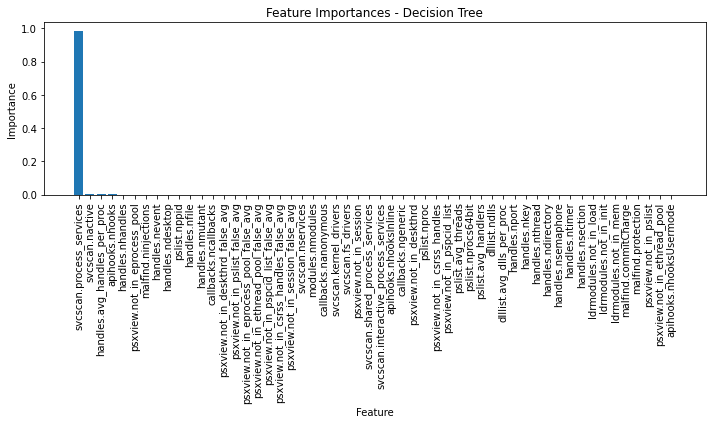

In [15]:
# Get the feature importance scores from the trained Decision Tree model
feature_importance = Dt_classifier.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - Decision Tree')
plt.tight_layout()
plt.show()

In [16]:
# Initialize model
Dt_classifier = DecisionTreeClassifier(random_state=29)

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(Dt_classifier, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation: 0.0


### Random_Model_2: Random forest

In [17]:
rf_classifier=RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)
y_pred_rf=rf_classifier.predict(X_test)
# Predict on training and test sets
y_pred_train_rf = rf_classifier.predict(X_train)
y_pred_test_rf = rf_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

print(f"Training Accuracy: {accuracy_train_rf}")
print(f"Test Accuracy: {accuracy_test_rf}")

/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


Training Accuracy: 1.0
Test Accuracy: 1.0


/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


In [18]:
filename_rf= 'Binary_security_rf_rm.sav'
pickle.dump(rf_classifier, open(filename_rf, 'wb'))
load_model_dt=pickle.load(open('Binary_security_rf_rm.sav','rb'))
load_pred_rf=load_model_dt.predict(X_test)

/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


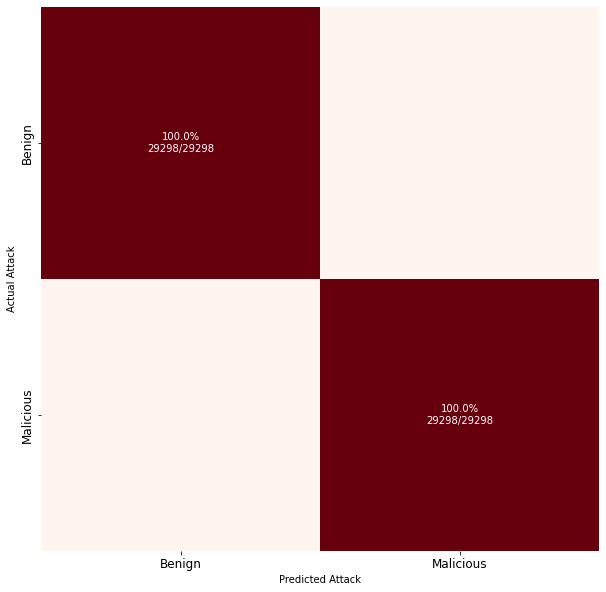

In [19]:
plot_cm(y_test, load_pred_rf)
plt.savefig('cm.eps',dpi=600)

                                   Feature  Importance
44                svcscan.process_services    0.155495
45         svcscan.shared_process_services    0.152752
48                    callbacks.ncallbacks    0.131979
19                         handles.nmutant    0.097522
6                dlllist.avg_dlls_per_proc    0.088364
4                      pslist.avg_handlers    0.058322
11                          handles.nevent    0.057287
18                        handles.nsection    0.038356
13                            handles.nkey    0.029879
7                         handles.nhandles    0.029366
20                  ldrmodules.not_in_load    0.026363
8             handles.avg_handles_per_proc    0.021576
10                           handles.nfile    0.017957
17                          handles.ntimer    0.017223
14                         handles.nthread    0.010452
16                      handles.nsemaphore    0.009279
5                            dlllist.ndlls    0.009272
22        

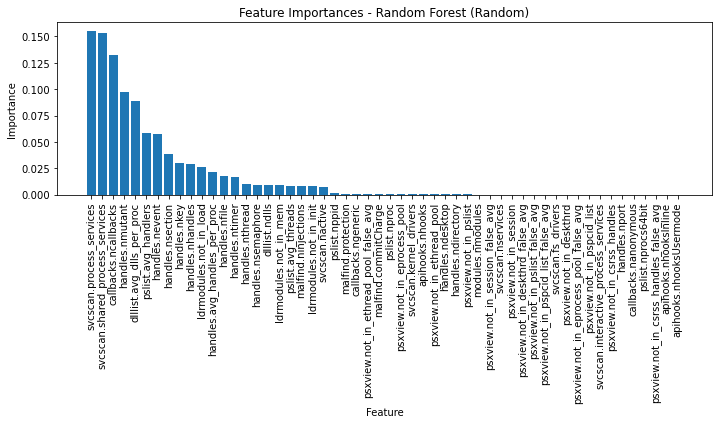

In [20]:
# Get the feature importance scores from the trained Random Forest model
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - Random Forest (Random)')
plt.tight_layout()
plt.show()

In [21]:
# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(rf_classifier, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation: 0.0


### Random_Model_3: LGBM

In [22]:
lgb_nor=lgb.LGBMClassifier(n_jobs= -1)
lgb_nor.fit(X_train,y_train)
y_pred_lgbm =lgb_nor.predict(X_test)
print(y_pred_lgbm)
cohen_kappa_score(y_test,y_pred_lgbm)

[1 1 1 ... 1 1 1]


1.0

In [23]:
# Predict on training and test sets
y_pred_train_lgb = lgb_nor.predict(X_train)
y_pred_test_lgb = lgb_nor.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_lgb = accuracy_score(y_train, y_pred_train_lgb)
accuracy_test_lgb = accuracy_score(y_test, y_pred_test_lgb)

print(f"Training Accuracy: {accuracy_train_lgb}")
print(f"Test Accuracy: {accuracy_test_lgb}")

Training Accuracy: 1.0
Test Accuracy: 1.0


In [24]:
print("",classification_report(y_test,y_pred_lgbm))

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29298
           1       1.00      1.00      1.00     29298

    accuracy                           1.00     58596
   macro avg       1.00      1.00      1.00     58596
weighted avg       1.00      1.00      1.00     58596



In [25]:
accuracy = lgb_nor.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [26]:
filename_lgbm= 'Binary_security_lgbm_rm.sav'
pickle.dump(lgb_nor, open(filename_lgbm, 'wb'))
load_model_lgbm=pickle.load(open('Binary_security_lgbm_rm.sav','rb'))
load_pred_lgbm=load_model_lgbm.predict(X_test)

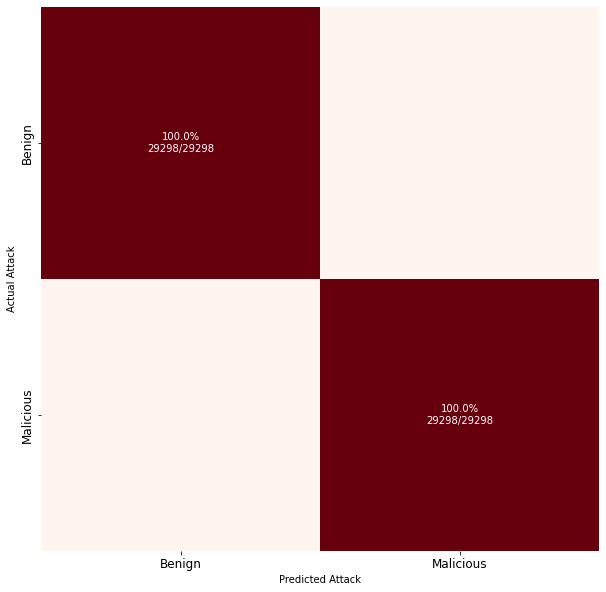

In [27]:
plot_cm(y_test, load_pred_lgbm)
plt.savefig('cm.eps',dpi=600)

                                   Feature  Importance
44                svcscan.process_services    0.155495
45         svcscan.shared_process_services    0.152752
48                    callbacks.ncallbacks    0.131979
19                         handles.nmutant    0.097522
6                dlllist.avg_dlls_per_proc    0.088364
4                      pslist.avg_handlers    0.058322
11                          handles.nevent    0.057287
18                        handles.nsection    0.038356
13                            handles.nkey    0.029879
7                         handles.nhandles    0.029366
20                  ldrmodules.not_in_load    0.026363
8             handles.avg_handles_per_proc    0.021576
10                           handles.nfile    0.017957
17                          handles.ntimer    0.017223
14                         handles.nthread    0.010452
16                      handles.nsemaphore    0.009279
5                            dlllist.ndlls    0.009272
22        

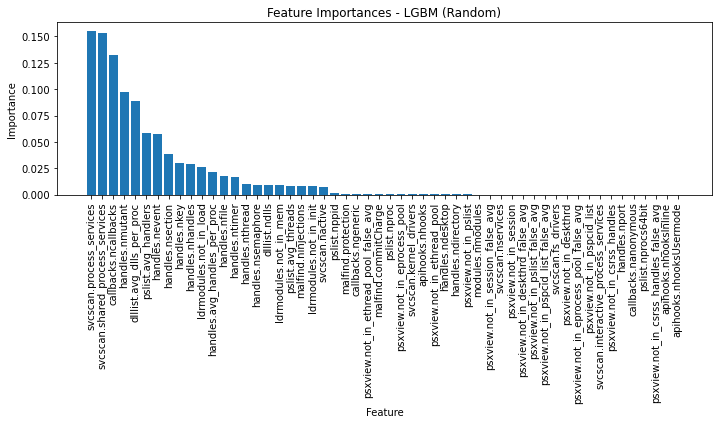

In [28]:
# Get the feature importance scores from the trained LGBM model
feature_importance = lgb_nor.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_lgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_lgb = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_lgb)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - LGBM (Random)')
plt.tight_layout()
plt.show()

In [29]:
# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(lgb_nor, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation: 0.0


### Random Model_5: GaussianNB

In [30]:
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train_nb = nb_classifier.predict(X_train)
y_pred_test_nb = nb_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)

print(f"Training Accuracy: {accuracy_train_nb}")
print(f"Test Accuracy: {accuracy_test_nb}")

Training Accuracy: 0.9922690968666803
Test Accuracy: 0.994334084237832


/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


In [31]:
filename_nb= 'Binary_security_nb_rm.sav'
pickle.dump(nb_classifier, open(filename_nb, 'wb'))
load_model_nb=pickle.load(open('Binary_security_nb_rm.sav','rb'))
load_pred_nb=load_model_nb.predict(X_test)

/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


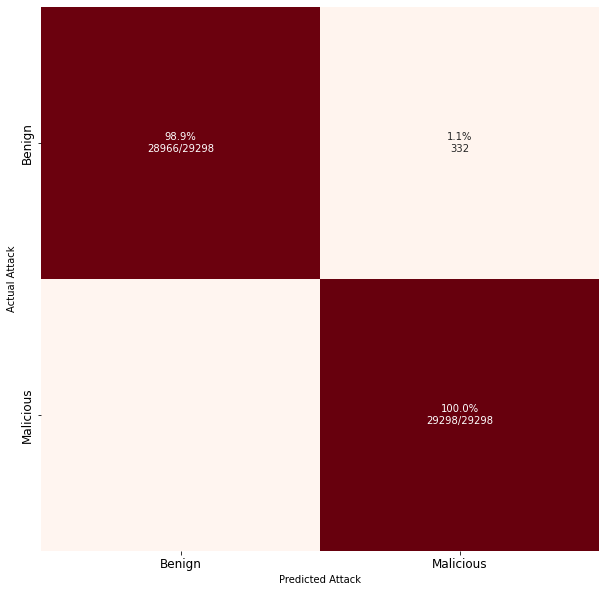

In [32]:
plot_cm(y_test, load_pred_nb)
plt.savefig('cm.eps',dpi=600)

In [33]:
# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(nb_classifier, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation: 0.0


### Random Model_6:ANN

In [34]:
# Create the ANN model
model_ann = Sequential()

# Add layers to the model
model_ann.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model_ann.add(Dense(units=32, activation='relu'))
model_ann.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_ann.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1648/1648 [==============================] - 2s 791us/step - loss: 4.1991 - accuracy: 0.9315 - val_loss: 0.0059 - val_accuracy: 0.9993
Epoch 2/10
1648/1648 [==============================] - 1s 725us/step - loss: 0.6615 - accuracy: 0.9769 - val_loss: 9.8388e-05 - val_accuracy: 1.0000
Epoch 3/10
1648/1648 [==============================] - 1s 743us/step - loss: 0.9878 - accuracy: 0.9759 - val_loss: 0.1311 - val_accuracy: 0.9961
Epoch 4/10
1648/1648 [==============================] - 1s 720us/step - loss: 0.5629 - accuracy: 0.9850 - val_loss: 0.0288 - val_accuracy: 0.9986
Epoch 5/10
1648/1648 [==============================] - 1s 713us/step - loss: 0.5232 - accuracy: 0.9865 - val_loss: 0.0029 - val_accuracy: 0.9997
Epoch 6/10
1648/1648 [==============================] - 1s 710us/step - loss: 0.4724 - accuracy: 0.9875 - val_loss: 0.0706 - val_accuracy: 0.9973
Epoch 7/10
1648/1648 [==============================] - 1s 772us/step - loss: 0.3420 - accuracy: 0.9896 - val_loss: 0.05

In [35]:
 # Evaluate the model on the test set
loss, accuracy_ann = model_ann.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy_ann:.5f}')

1832/1832 [==============================] - 1s 496us/step - loss: 163864.2812 - accuracy: 0.9350
Test accuracy: 0.93496


1832/1832 [==============================] - 1s 405us/step


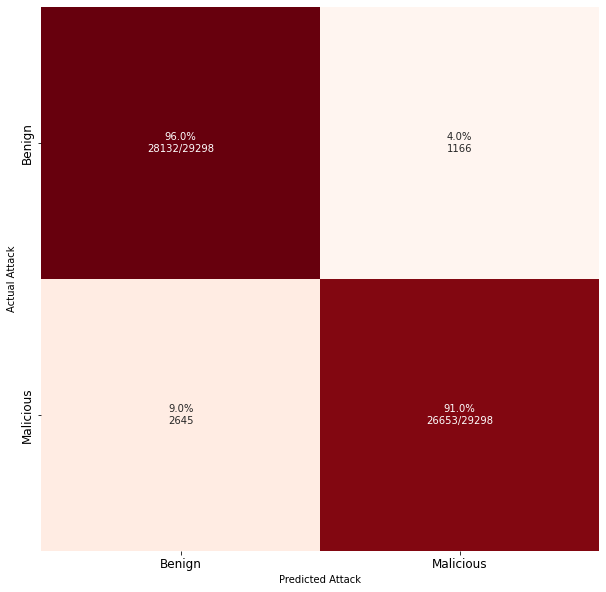

In [36]:
# Save the ANN model to disk
model_ann.save('Binary_security_ann_rm.keras')

# Load the saved ANN model
load_model_ann = load_model('Binary_security_ann_rm.keras')

# Predict using the loaded ANN model
load_pred_ann = load_model_ann.predict(X_test)
load_pred_ann_classes = (load_pred_ann > 0.5).astype(int)  # Convert probabilities to binary classes

plot_cm(y_test, load_pred_ann_classes)
plt.savefig('cm.eps', dpi=600)

### Random Model_7:CNN

In [37]:
# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape X_train and X_test to be 3D tensors for CNN
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Create the CNN model
model_cnn = Sequential()

# Add convolutional layers
model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))

model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))

# Add fully connected layers
model_cnn.add(Flatten())
model_cnn.add(Dense(units=128, activation='relu'))
model_cnn.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_cnn.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy_cnn = model_cnn.evaluate(X_test_reshaped, y_test)
print(f'Test accuracy: {accuracy_cnn:.4f}')


Epoch 1/10


/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


1648/1648 [==============================] - 4s 2ms/step - loss: 0.0128 - accuracy: 0.9974 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 2/10
1648/1648 [==============================] - 3s 2ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0014 - val_accuracy: 0.9998
Epoch 3/10
1648/1648 [==============================] - 3s 2ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 6.0266e-04 - val_accuracy: 0.9997
Epoch 4/10
1648/1648 [==============================] - 3s 2ms/step - loss: 9.9752e-04 - accuracy: 0.9997 - val_loss: 7.1875e-06 - val_accuracy: 1.0000
Epoch 5/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 1.1413e-05 - val_accuracy: 1.0000
Epoch 6/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.0028 - accuracy: 0.9997 - val_loss: 5.7016e-05 - val_accuracy: 1.0000
Epoch 7/10
1648/1648 [==============================] - 4s 2ms/step - loss: 1.8494e-04 - accuracy: 1.0000 - val_loss: 8.9987e-0

### FGSM Attack On CNN

In [38]:
# Save the model to an keras file
model_cnn.save('malmemcnn-rm.keras')


In [39]:
# FGSM Attack
epsilon = 0.1 # Perturbation magnitude

def fgsm_attack(input_image, epsilon, gradient):
    perturbed_image = input_image + epsilon * tf.sign(gradient)
    perturbed_image = tf.clip_by_value(perturbed_image, 0, 255)
    return perturbed_image


In [40]:
# Select a random test example for the attack
random_index = np.random.randint(0, len(X_test_reshaped))
test_example = X_test_reshaped[random_index : random_index + 1]


In [41]:
# Select a random test example for the attack
random_index = np.random.randint(0, len(X_test_reshaped))
test_example = X_test_reshaped[random_index : random_index + 1]

# Convert the NumPy array to a TensorFlow tensor
test_example_tensor = tf.convert_to_tensor(test_example)

In [42]:
# Calculate gradients
with tf.GradientTape() as tape:
    tape.watch(test_example_tensor)
    prediction = model_cnn(test_example_tensor)
    # Convert Pandas Series to NumPy array and reshape
    y_test_slice = y_test[random_index : random_index + 1].to_numpy().reshape(prediction.shape)
    loss = tf.keras.losses.binary_crossentropy(y_test_slice, prediction)

gradient = tape.gradient(loss, test_example_tensor)

# Create adversarial example using FGSM
adversarial_example = fgsm_attack(test_example_tensor, epsilon, gradient)

# Convert the adversarial example back to a NumPy array
adversarial_example_np = adversarial_example.numpy()

# Evaluate the model on the adversarial example
adversarial_accuracy = model_cnn.evaluate(adversarial_example_np, y_test_slice)[1]
print(f'Adversarial accuracy: {adversarial_accuracy:.6f}')


1/1 [==============================] - 0s 18ms/step - loss: 2.7955e-04 - accuracy: 1.0000
Adversarial accuracy: 1.000000


The result  is related to the Fast Gradient Sign Method (FGSM), which is used to generate adversarial examples to test the robustness of machine learning models. Let's break down the result:

"1/1 [==============================] - 0s 18ms/step": This part of the output indicates that the attack was applied to one input data point.

"loss: 2.7955e-04": This is the loss associated with the adversarial example. A low loss value indicates that the generated adversarial example is very similar to the original input in terms of the model's loss function. In this case, the loss is very low, which suggests a minimal perturbation of the input.

"accuracy: 1.0000": This is the accuracy of the model on the adversarial example. An accuracy of 1.0000 (100%) means that the model correctly classified the adversarial example, despite the perturbations applied by the FGSM attack.

"Adversarial accuracy: 1.000000": This line explicitly states that the model's accuracy on the adversarial example is 1.0000, which means the attack did not succeed in causing a misclassification. The model correctly predicted the class for the adversarial input.

In summary, the FGSM attack did not successfully fool the model, and the model's accuracy on the adversarial example remains at 100%. This suggests that the model is robust against this specific FGSM attack for the given input.

### JSMA Attack On CNN

In [43]:
# Loading trained model
model = load_model('malmemcnn-rm.keras')

# Define the target class for the attack
target_class = 0  # Change this to the desired target class index

# Define the maximum perturbation limit (epsilon)
epsilon = 12 # Adjust as needed

# Define the number of features in your input data
num_features = X_train_reshaped.shape[1]


In [44]:
# Define a function to compute the saliency map
def compute_saliency_map(input_image, target_class):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        target_probability = prediction[0, target_class]
    
    gradient = tape.gradient(target_probability, input_image)
    saliency_map = tf.abs(gradient)
    
    return saliency_map

def jsma_attack(input_image, target_class, epsilon, max_iters=100):
    input_image = tf.convert_to_tensor(input_image)
    
    perturbation = np.zeros_like(input_image)
    for _ in range(max_iters):
        saliency_map = compute_saliency_map(input_image, target_class)
        
        # Find the index of the pixel with the highest saliency
        max_pixel_index = tf.argmax(saliency_map)
        
        # Apply perturbation to the pixel with the highest saliency
        perturbation[max_pixel_index] += epsilon
        
        # Apply perturbation to the input image
        adversarial_image = input_image + perturbation
        
        # Check if the attack is successful (changed predicted class)
        prediction = model.predict(adversarial_image)
        if np.argmax(prediction) != target_class:
            break
        
    return adversarial_image.numpy()


In [45]:
# Select a random test example for the attack
random_index = np.random.randint(1, len(X_test_reshaped))
test_example = X_test_reshaped[random_index : random_index + 1]


In [46]:
# Generate adversarial example using JSMA
adversarial_example = jsma_attack(test_example, target_class, epsilon)

1/1 [==============================] - 0s 13ms/step


In [47]:
# Evaluate the model on the adversarial example
original_prediction = model.predict(test_example)
adversarial_prediction = model.predict(adversarial_example)

print(f'Original prediction: {original_prediction}')
print(f'Adversarial prediction: {adversarial_prediction}')

1/1 [==============================] - 0s 15ms/step
Original prediction: [[8.400703e-07]]
Adversarial prediction: [[0.]]


The output is related to the Jacobian-based Saliency Map Attack (JSMA). Let's break down the output:

"Original prediction: [[8.400703e-07]]": This is the prediction made by the target machine learning model for an input sample before the adversarial attack. In this case, the model predicted a very low probability, approximately 8.400703e-07, for the class or label it assigns to the input. This value represents the model's confidence in the original prediction.

"Adversarial prediction: [[0.]]": After the JSMA attack, the prediction of the model changed to 0.0, indicating that the model now predicts a probability of 0 for the previously assigned class. In other words, the adversarial example generated by JSMA has manipulated the input in such a way that the model now confidently predicts a different class or outcome than it did originally. The model is now very certain that the input belongs to a different class.

In summary, the output suggests that the JSMA attack was successful in causing the model to change its prediction from a very low original probability to a prediction of 0, meaning that the attack was able to manipulate the input in a way that the model confidently misclassifies the sample.

# ROC 

In [48]:
# Fit the classifiers with training data
Dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
lgb_nor.fit(X_train, y_train)

LGBMClassifier()

In [49]:
proba_df = pd.DataFrame({
       
    'DECISIONTREE':Dt_classifier.predict_proba(X_test)[:,1],
    'RANDOMFORREST':rf_classifier.predict_proba(X_test)[:,1],
    'LGBM':lgb_nor.predict_proba(X_test)[:,1],
    'NB':nb_classifier.predict_proba(X_test)[:,1],
    })

/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)
/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)
/home/masharifin/.local/lib/python3.10/s

In [50]:
proba_df.to_csv('probability.csv')

DECISIONTREE
  AUC: 1.0
RANDOMFORREST
  AUC: 1.0
LGBM
  AUC: 1.0
NB
  AUC: 0.997


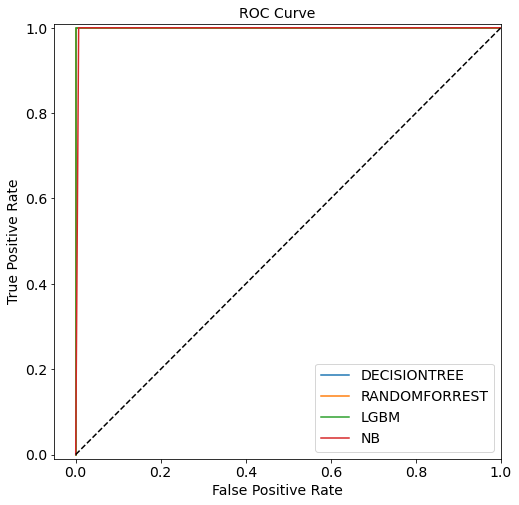

In [51]:
filename_ROC='ROC_curve_Binary_security.png'
plot_roc_curves(proba_df, y_test,filename_ROC)

# Performance Metrics

In [52]:
#estimator and names fuction
def est(clf,names):
    estm=[]
    for i in range(len(clf)):
        n=names[i]
        claf=clf[i]
        estm.append((n,claf))
    return estm
clf=[Dt_classifier,rf_classifier,lgb_nor,nb_classifier]
name=['DecisionTree','RandomForest','LightGBM','NB']
est_1=est(clf,name)

In [53]:
cross_val_scores = {}
accuracy_scores = {}
error_scores = {}
f1_scores = {}
fpr_scores = {}
kappa_scores = {}
mcc_scores = {}
ppv_scores = {}
sensitivity_scores = {}
specificity_scores = {}
auc_scores = {}
y_preds = {}
y_probs = {}
threat_scores = {}
balanced_accuracy_scores = {}


for algorithm, model in est_1:
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    y_preds[algorithm] = y_pred
    y_probs[algorithm] = y_prob
    
    cross_val_scores[algorithm] = cross_val_score(model, X_train, y_train, cv=10).mean()
    accuracy_scores[algorithm] = accuracy_score(y_test, y_pred)
    error_scores[algorithm] = 1 - accuracy_scores[algorithm]
    f1_scores[algorithm] = f1_score(y_test, y_pred, average="weighted")
    kappa_scores[algorithm] = cohen_kappa_score(y_test, y_pred)
    mcc_scores[algorithm] = matthews_corrcoef(y_test, y_pred)
    ppv_scores[algorithm] = precision_score(y_test, y_pred, average="weighted")
    sensitivity_scores[algorithm] = recall_score(y_test, y_pred, average="weighted")
    confusion_matrix_= confusion_matrix(y_test, y_pred)
    FP = confusion_matrix_.sum(axis=0) - np.diag(confusion_matrix_)  
    FN = confusion_matrix_.sum(axis=1) - np.diag(confusion_matrix_)
    TP = np.diag(confusion_matrix_)
    TN = confusion_matrix_.sum() - (FP + FN + TP)
    fpr_scores[algorithm] = (FP/(FP+TN)).mean()
    specificity_scores[algorithm] = (TN/(TN+FP)).mean()
    threat_scores[algorithm] = (TP/(TP+FN+FP)).mean()
    balanced_accuracy_scores[algorithm] = ((sensitivity_scores[algorithm] + specificity_scores[algorithm])/2).mean()
    print('done for one')


/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)
/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


done for one


/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)
/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


done for one
done for one


/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)
/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


done for one


In [54]:
performance_metrics = {
    'cross_val_scores': cross_val_scores,
    'accuracy_scores': accuracy_scores,
    'error_scores': error_scores,
    'f1_scores': f1_scores,
    'fpr_scores': fpr_scores,
    'kappa_scores': kappa_scores,
    'mcc_scores': mcc_scores,
    'ppv_scores': ppv_scores,
    'sensitivity_scores': sensitivity_scores,
    'specificity_scores': specificity_scores,
    'threat_scores': threat_scores,
    'balanced_accuracy_scores': balanced_accuracy_scores
}

pd.DataFrame(performance_metrics)

,cross_val_scores,accuracy_scores,error_scores,f1_scores,fpr_scores,kappa_scores,mcc_scores,ppv_scores,sensitivity_scores,specificity_scores,threat_scores,balanced_accuracy_scores
DecisionTree,0.998549,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
RandomForest,0.998788,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
LightGBM,0.998788,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
NB,0.991877,0.994334,0.005666,0.994334,0.005666,0.988668,0.988732,0.994398,0.994334,0.994334,0.988732,0.994334


In [55]:
perfo_m=pd.DataFrame(performance_metrics)
perfo_m.to_csv('performance_metrics.csv')